## Importing The Required Libraries/Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## Reading in the Train, Test and Sample_Submission Datasets

In [2]:
data = pd.read_csv("train.csv")

In [3]:
test_data = pd.read_csv("test.csv")

In [4]:
submission_data = pd.read_csv("sample_submission.csv")

## Inspecting the properties of the Dataset

In [5]:
data.describe()

,Earnings,Customer_Worth,Premium_Auto_per_Month,Total Claim Amount,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,Best_Offer
count,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000
mean,75460.097294,7977.945276,186.728297,435.023938,15.100266,47.987956,0.768340,2.986235,0.968247
std,60449.019210,6718.376651,69.099601,292.522148,10.112762,27.853750,1.845483,2.399311,1.010780
min,0.000000,1900.007675,122.000000,0.099007,0.000000,0.000000,0.000000,1.000000,0.000000
25%,20674.000000,4070.092649,136.000000,273.250112,6.000000,24.000000,0.000000,1.000000,0.000000
50%,67934.000000,5813.996703,166.000000,381.118731,14.000000,48.000000,0.000000,2.000000,1.000000
75%,124652.000000,8988.610653,218.000000,547.200000,23.000000,71.000000,0.000000,4.000000,2.000000
max,199962.000000,83327.381190,594.000000,2893.239678,35.000000,99.000000,10.000000,9.000000,3.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6393 entries, 0 to 6392
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_ID                    6393 non-null   object 
 1   Sex                            6393 non-null   object 
 2   Earnings                       6393 non-null   int64  
 3   Region_Code                    6393 non-null   object 
 4   Marital Status                 6393 non-null   object 
 5   State_of_Origin                6393 non-null   object 
 6   Customer_Worth                 6393 non-null   float64
 7   Customer_Reply                 6393 non-null   object 
 8   Plan                           6393 non-null   object 
 9   Certification                  6393 non-null   object 
 10  Effective To Date              6393 non-null   object 
 11  Status_of_Employment           6393 non-null   object 
 12  Premium_Auto_per_Month         6393 non-null   i

In [7]:
data.size

153432

In [8]:
data.ndim

2

In [9]:
data.shape

(6393, 24)

In [10]:
data.index

RangeIndex(start=0, stop=6393, step=1)

In [11]:
data.dtypes.value_counts()

object     15
int64       7
float64     2
dtype: int64

In [12]:
data.dtypes

Customer_ID                       object
Sex                               object
Earnings                           int64
Region_Code                       object
Marital Status                    object
State_of_Origin                   object
Customer_Worth                   float64
Customer_Reply                    object
Plan                              object
Certification                     object
Effective To Date                 object
Status_of_Employment              object
Premium_Auto_per_Month             int64
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Months Since Last Claim            int64
Months Since Policy Inception      int64
Counts_of_Open_Complaints          int64
No_Of_POlicy                       int64
kind_of_policy                    object
Active_Policy                     object
Sales Channel                     object
Best_Offer                         int64
dtype: object

In [13]:
data.duplicated().sum()

0

In [14]:
data.isnull().sum()

Customer_ID                      0
Sex                              0
Earnings                         0
Region_Code                      0
Marital Status                   0
State_of_Origin                  0
Customer_Worth                   0
Customer_Reply                   0
Plan                             0
Certification                    0
Effective To Date                0
Status_of_Employment             0
Premium_Auto_per_Month           0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Months Since Last Claim          0
Months Since Policy Inception    0
Counts_of_Open_Complaints        0
No_Of_POlicy                     0
kind_of_policy                   0
Active_Policy                    0
Sales Channel                    0
Best_Offer                       0
dtype: int64

## Deeper inspection of the Train Dataset on a columnal basis

In [15]:
data["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
data["Sex"].value_counts()

Female    3259
Male      3134
Name: Sex, dtype: int64

In [17]:
data["Earnings"].unique()

array([ 97134,  53754,  25804, ...,  24360, 175914, 156184], dtype=int64)

In [18]:
data["Earnings"].value_counts()

0         1584
191394       9
133678       6
79708        6
51930        6
          ... 
74898        1
120932       1
54416        1
156254       1
77740        1
Name: Earnings, Length: 4124, dtype: int64

In [19]:
data["Region_Code"].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [20]:
data["Region_Code"].value_counts()

Suburban    4046
Rural       1231
Urban       1116
Name: Region_Code, dtype: int64

In [21]:
data["Marital Status"].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [22]:
data["Marital Status"].value_counts()

Married     3735
Single      1682
Divorced     976
Name: Marital Status, dtype: int64

In [23]:
data["State_of_Origin"].unique()

array(['Kano', 'Abuja', 'Lagos', 'Imo', 'Enugu'], dtype=object)

In [24]:
data["State_of_Origin"].value_counts()

Lagos    2225
Abuja    1819
Imo      1158
Enugu     646
Kano      545
Name: State_of_Origin, dtype: int64

In [25]:
data["Customer_Worth"].unique()

array([5017.009472, 5151.301306, 4906.894731, ..., 7336.328083,
       8994.779137, 3351.639274])

In [26]:
data["Customer_Worth"].value_counts()

2621.337376     6
5991.773931     6
2540.626320     6
4906.894731     6
3646.833554     6
               ..
15255.264360    1
3576.990725     1
12233.879680    1
4215.918619     1
8497.164213     1
Name: Customer_Worth, Length: 5711, dtype: int64

In [27]:
data["Customer_Reply"].unique()

array(['Interested', 'Not_interested'], dtype=object)

In [28]:
data["Customer_Reply"].value_counts()

Not_interested    5494
Interested         899
Name: Customer_Reply, dtype: int64

In [29]:
data["Plan"].unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [30]:
data["Plan"].value_counts()

Bronze    3895
Silver    1928
Gold       570
Name: Plan, dtype: int64

In [31]:
data["Certification"].unique()

array(['First_Degree', 'HND', 'PHD', 'O_Level', 'Second_Degree'],
      dtype=object)

In [32]:
data["Certification"].value_counts()

First_Degree     1896
HND              1880
O_Level          1864
Second_Degree     500
PHD               253
Name: Certification, dtype: int64

In [33]:
data["Effective To Date"].unique()

array(['3/2/2011', '1/22/11', '2/14/11', '8/1/2011', '2/19/11', '2/17/11',
       '1/1/2011', '1/23/11', '5/2/2011', '2/2/2011', '2/13/11',
       '2/27/11', '2/20/11', '1/29/11', '12/2/2011', '2/25/11',
       '6/1/2011', '1/30/11', '1/13/11', '1/24/11', '2/26/11', '1/16/11',
       '2/18/11', '1/27/11', '10/1/2011', '12/1/2011', '2/16/11',
       '1/31/11', '1/19/11', '3/1/2011', '2/28/11', '7/2/2011', '2/24/11',
       '1/25/11', '4/2/2011', '1/14/11', '11/1/2011', '1/2/2011',
       '1/18/11', '5/1/2011', '7/1/2011', '2/23/11', '1/20/11',
       '11/2/2011', '1/17/11', '2/22/11', '8/2/2011', '9/1/2011',
       '1/21/11', '2/21/11', '9/2/2011', '2/1/2011', '1/28/11',
       '4/1/2011', '6/2/2011', '1/26/11', '2/15/11', '10/2/2011',
       '1/15/11'], dtype=object)

In [34]:
data["Effective To Date"].value_counts()

10/1/2011    142
1/27/11      135
2/14/11      133
2/19/11      132
1/20/11      130
1/31/11      129
1/26/11      125
1/17/11      123
1/28/11      123
3/1/2011     122
5/2/2011     119
2/28/11      119
1/19/11      118
2/26/11      116
2/27/11      116
12/2/2011    115
2/22/11      115
4/2/2011     115
11/1/2011    113
1/1/2011     112
1/18/11      112
11/2/2011    111
1/29/11      111
2/1/2011     111
1/21/11      109
9/1/2011     108
1/25/11      108
2/18/11      108
1/14/11      107
10/2/2011    106
7/1/2011     106
1/24/11      105
2/13/11      105
1/30/11      104
1/15/11      104
6/2/2011     104
2/23/11      104
6/1/2011     104
7/2/2011     104
2/2/2011     102
1/23/11      102
1/2/2011     101
2/21/11      101
1/13/11      101
9/2/2011     100
5/1/2011      99
2/25/11       99
2/24/11       99
3/2/2011      98
1/16/11       96
1/22/11       95
8/2/2011      95
2/16/11       92
2/17/11       92
2/20/11       92
8/1/2011      91
2/15/11       90
12/1/2011     85
4/1/2011      

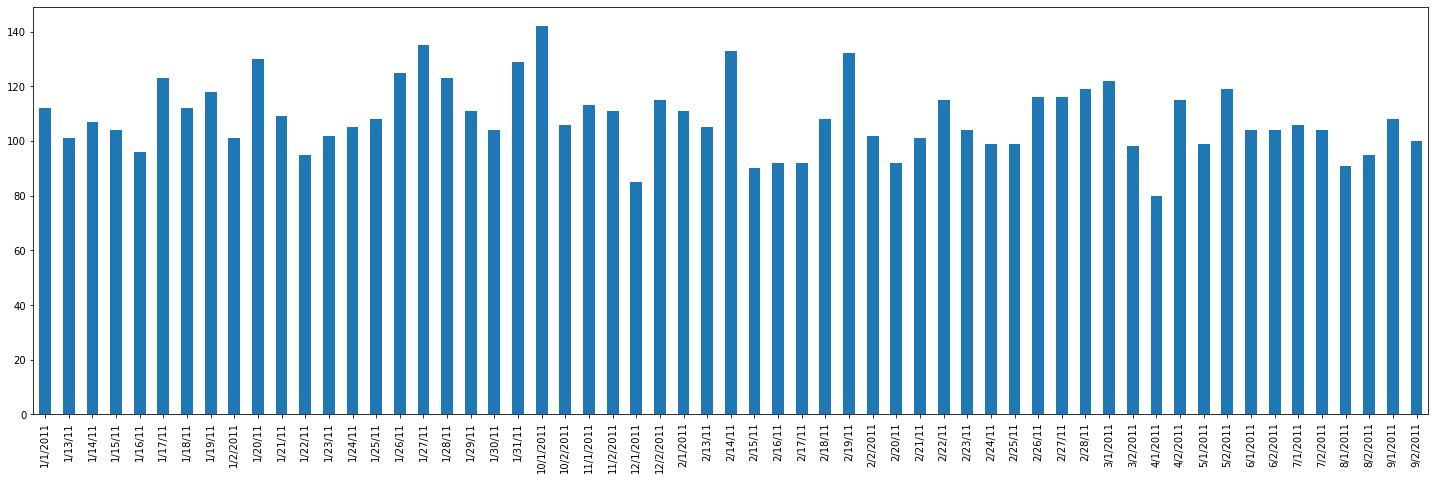

In [35]:
plt.figure(figsize=(25, 7.5))
data["Effective To Date"].value_counts().sort_index().plot.bar();

In [36]:
data["Status_of_Employment"].unique()

array(['Fully_Employed', 'In_Retirement', 'Not_employed', 'Disabled',
       'On_Leave'], dtype=object)

In [37]:
data["Status_of_Employment"].value_counts()

Fully_Employed    4005
Not_employed      1584
On_Leave           304
Disabled           295
In_Retirement      205
Name: Status_of_Employment, dtype: int64

In [38]:
data["Vehicle Class"].unique()

array(['SUV', 'Sports Car', 'Four-Door Car', 'Two-Door Car', 'Luxury Car',
       'Luxury SUV'], dtype=object)

In [39]:
data["Vehicle Class"].value_counts()

Four-Door Car    3221
Two-Door Car     1316
SUV              1264
Sports Car        336
Luxury Car        128
Luxury SUV        128
Name: Vehicle Class, dtype: int64

In [40]:
data["Vehicle Size"].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [41]:
data["Vehicle Size"].value_counts()

Medsize    4501
Small      1235
Large       657
Name: Vehicle Size, dtype: int64

In [42]:
data["Counts_of_Open_Complaints"].unique()

array([ 0,  2,  6,  4,  8, 10], dtype=int64)

In [43]:
data["Counts_of_Open_Complaints"].value_counts()

0     5097
2      696
4      239
6      208
8      107
10      46
Name: Counts_of_Open_Complaints, dtype: int64

In [44]:
data["No_Of_POlicy"].unique()

array([1, 8, 3, 2, 7, 5, 6, 4, 9], dtype=int64)

In [45]:
data["No_Of_POlicy"].value_counts()

1    2250
2    1613
3     816
7     310
9     292
4     285
5     283
8     275
6     269
Name: No_Of_POlicy, dtype: int64

In [46]:
data["kind_of_policy"].unique()

array(['Corporate', 'Personal', 'Special'], dtype=object)

In [47]:
data["kind_of_policy"].value_counts()

Personal     4774
Corporate    1347
Special       272
Name: kind_of_policy, dtype: int64

In [48]:
data["Active_Policy"].unique()

array(['C_L2', 'P_L2', 'P_L3', 'P_L1', 'C_L3', 'C_L1', 'S_L1', 'S_L3',
       'S_L2'], dtype=object)

In [49]:
data["Active_Policy"].value_counts()

P_L3    2409
P_L2    1483
P_L1     882
C_L3     683
C_L2     418
C_L1     246
S_L2     116
S_L3     107
S_L1      49
Name: Active_Policy, dtype: int64

In [50]:
data["Sales Channel"].unique()

array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object)

In [51]:
data["Sales Channel"].value_counts()

Agent          2437
Branch         1783
Call Center    1247
Web             926
Name: Sales Channel, dtype: int64

In [52]:
data["Best_Offer"].unique()

array([1, 3, 0, 2], dtype=int64)

In [53]:
data["Best_Offer"].value_counts()

0    2640
1    2046
2     977
3     730
Name: Best_Offer, dtype: int64

In [54]:
data.corr()

,Earnings,Customer_Worth,Premium_Auto_per_Month,Total Claim Amount,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,Best_Offer
Earnings,1.000000,0.021600,-0.021647,-0.355120,-0.018953,0.000156,0.011088,-0.004603,0.140847
Customer_Worth,0.021600,1.000000,0.397330,0.236922,0.012501,0.022831,-0.044684,0.022783,-0.075192
Premium_Auto_per_Month,-0.021647,0.397330,1.000000,0.634102,0.002220,0.020411,-0.015891,-0.013794,-0.080059
Total Claim Amount,-0.355120,0.236922,0.634102,1.000000,0.004859,0.004426,-0.013676,-0.000745,-0.101028
Months Since Last Claim,-0.018953,0.012501,0.002220,0.004859,1.000000,-0.042053,-0.004648,0.001456,-0.001296
Months Since Policy Inception,0.000156,0.022831,0.020411,0.004426,-0.042053,1.000000,-0.004945,-0.008449,-0.088650
Counts_of_Open_Complaints,0.011088,-0.044684,-0.015891,-0.013676,-0.004648,-0.004945,1.000000,-0.017468,-0.028014
No_Of_POlicy,-0.004603,0.022783,-0.013794,-0.000745,0.001456,-0.008449,-0.017468,1.000000,-0.079268
Best_Offer,0.140847,-0.075192,-0.080059,-0.101028,-0.001296,-0.088650,-0.028014,-0.079268,1.000000


## Preparing the Data for the required transformation necessary for Machine Learning

In [55]:
categoryOneHotEncoding = ["Sex", "Customer_Reply", "Region_Code", "Marital Status", "State_of_Origin", "Plan", "Certification", "Status_of_Employment", "Vehicle Class", "Vehicle Size", "kind_of_policy", "Active_Policy", "Sales Channel"]

numericalScaling = ["Earnings", "Customer_Worth", "Premium_Auto_per_Month", "Total Claim Amount", "Months Since Last Claim", "Months Since Policy Inception", "Counts_of_Open_Complaints", "No_Of_POlicy"]

toBeEvalAndTrans = ["Effective To Date"]

In [56]:
y = data["Best_Offer"]

In [57]:
%pwd
%cd
%cd Desktop/WQU/TDI (WQU)/Random Files/DSN Hackathon/KPMG/Task 1
%pwd
from sklearn_classes import CreateCategoricals, SelectColumns
%cd
%cd Desktop/WQU/dsn-prebootcamp-2021

C:\Users\HP
C:\Users\HP\Desktop\WQU\TDI (WQU)\Random Files\DSN Hackathon\KPMG\Task 1
C:\Users\HP
C:\Users\HP\Desktop\WQU\dsn-prebootcamp-2021


In [58]:
hotEncodingPipeline = Pipeline([("selectCategories", SelectColumns(categoryOneHotEncoding)), ("oneHotEncode", OneHotEncoder(sparse=False))])

In [59]:
scaledNumericalPipeline = Pipeline([("selectNumericals", SelectColumns(numericalScaling)), ("scaledData", StandardScaler())])

In [60]:
class CreateAdditionalColumns(BaseEstimator, TransformerMixin) :
    
    def __init__(self, added_column, formula) :
        self.added_column = added_column
        self.formula = formula
        
        
    def fit(self, X, y = None) :
        
        return self
    
    
    def transform(self, X) :
        
        X[self.added_column] = eval(self.formula)
        new_column = np.array(X.loc[:, self.added_column]).reshape(-1, 1)
        
        return new_column

In [61]:
formula = "data['Effective To Date'].apply(lambda x: monthDict[int(x[0 : x.index('/')])])"
monthDict = {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun", 7 : "Jul", 8 : "Aug", 9 : "Sept", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
transformEncodePipeline = Pipeline([("columnTransform", SelectColumns(toBeEvalAndTrans)), ("tranformedColumn", CreateAdditionalColumns("EffectiveToDate", formula)), ("encode", OneHotEncoder(sparse = False))])

In [62]:
union = Pipeline([("union", FeatureUnion([("hotEncoded", hotEncodingPipeline), ("scaled", scaledNumericalPipeline), ("transformedEncoded", transformEncodePipeline)])), ("poly", PolynomialFeatures())])

In [63]:
X = union.fit_transform(data)
X.shape

(6393, 2775)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f"x_train_shape => {x_train.shape}\n\ny_train_shape => {y_train.shape}\n\nx_test_shape => {x_test.shape}\n\ny_test_shape => {y_test.shape}")

x_train_shape => (5114, 2775)

y_train_shape => (5114,)

x_test_shape => (1279, 2775)

y_test_shape => (1279,)


## Building Machine Learning Models

In [65]:
%%time
forestModel = RandomForestClassifier(n_estimators= 171, min_samples_split=4, max_depth=11, max_leaf_nodes = 220, max_features=850, oob_score=True, random_state=0, n_jobs = -1, verbose = 1)
forestModel.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   60.0s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:  4.1min finished


Wall time: 4min 12s


RandomForestClassifier(max_depth=11, max_features=850, max_leaf_nodes=220,
                       min_samples_split=4, n_estimators=171, n_jobs=-1,
                       oob_score=True, random_state=0, verbose=1)

In [66]:
forestModel.oob_score_

0.5481032459913961

In [67]:
forestPredict = forestModel.predict(x_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 171 out of 171 | elapsed:    0.1s finished


In [68]:
accuracy_score(forestModel.predict(x_train), y_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 171 out of 171 | elapsed:    0.6s finished


0.7692608525615956

In [69]:
forestAccuracy = accuracy_score(y_test, forestPredict)
forestAccuracy

0.547302580140735

In [70]:
testData = union.transform(test_data)
testData.shape

(2741, 2775)

In [71]:
testPredict = forestModel.predict(testData)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 171 out of 171 | elapsed:    0.3s finished


In [72]:
dataDict = {"Customer_ID" : test_data["Customer_ID"], "Best_Offer" : testPredict}
submData = pd.DataFrame(dataDict)

In [73]:
#submData.to_csv("forestModel.csv", index=False)

#submData["Best_Offer"].value_counts()

This model gave me an accuracy score of 0.54730 on the notebook.

And it ranked me a score of 0.55321 on the competition submission, which takes me to the 2nd position on the Public Leaderboard. of the  Kaggle competition.

On the Private leaderboard, at the end of the competition, this model ranked 13th position on the Kaggle Competition.